In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mu_s_max = 0.80
mu_k = 0.50
epsilon = 1.0E-10

theta_max = 180.0/np.pi*np.arctan(mu_s_max) # maximum angle of incline in degrees (when slipping starts)
print ("Theta_max = ",theta_max)

t_max = 10.0 # maximum time of simulation.

m = 0.500 # mass of object in kg
g = 9.80 # acceleration of gravity in m/s^2

xs = 1.00
ys = 0.50
xl = 0.20
yl = 0.10

r = np.sqrt((xs/2.0)**2+(yl/2.0)**2) # radius to th
x0 = xs/2.0
y0 = yl/2.0
theta_0 = 180.0/np.pi*np.arctan(y0/x0)

Theta_max =  38.659808254090095


In [3]:
def get_acceleration(theta,mu):
    a = -g*np.sin(theta*np.pi/180.0)+mu*g*np.cos(theta*np.pi/180.0)
    return a

def get_friction(theta,mu):
    N = m*g*np.cos(theta*np.pi/180.0)
    f = mu*N
    return f

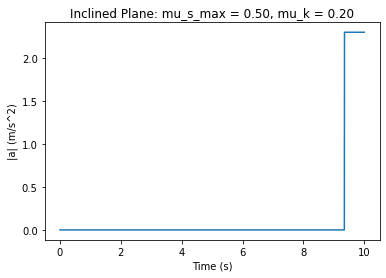

In [4]:
nsteps = 2001
debug = False

xpos = np.zeros(nsteps)
ypos = np.zeros(nsteps)

a = np.zeros(nsteps)
v = np.zeros(nsteps)
mu = np.zeros(nsteps)
theta_step = np.zeros(nsteps)
f = np.zeros(nsteps)
t = np.zeros(nsteps)

theta_old = 0.0
xpos_old = x0
ypos_old = y0
xpos[0] = x0
ypos[0] = y0

v[0] = 0.0
a[0] = 0.0
v_old = 0.0

for i in range(1,nsteps):
    dt = t_max/(nsteps-1)
    t[i] = i*dt
    theta_step[i] = t[i]/t_max*1.07*theta_max
    a_compare = get_acceleration(theta_step[i],mu_s_max)
    
    if (theta_step[i]) > theta_max: theta_step[i] = theta_max
        
    dtheta = theta_step[i]-theta_old
    
    if debug: print (i, theta_old, theta_step[i], a_compare, dtheta)
    
    theta_old = theta_step[i]
    
    if a_compare > 0:
        a[i] = 0.0
        mu_theta = np.tan(theta_step[i]*np.pi/180.0)
        f[i] = get_friction(theta_step[i],mu_theta)
        xpos[i] = xpos_old - r*dtheta*np.pi/180.0*np.sin(np.pi/180.0*(theta_step[i]+theta_0))
        ypos[i] = ypos_old + r*dtheta*np.pi/180.0*np.cos(np.pi/180.0*(theta_step[i]+theta_0))
        if debug: print ("static: ",i,xpos[i],xpos_old,ypos[i],ypos_old)
        xpos_old = xpos[i]
        ypos_old = ypos[i]
    else:
        a[i] = get_acceleration(theta_step[i],mu_k)
        f[i] = get_friction(theta_step[i],mu_k)
        v[i] = v_old + a[i]*dt
        dx = v_old*dt + 0.5*a[i]*dt**2
        v_old = v[i]
        
        xpos[i] = xpos_old + dx*np.cos(np.pi/180.0*theta_step[i])
        ypos[i] = ypos_old + dx*np.sin(np.pi/180.0*theta_step[i])
        if debug: print ("kinetic: ",i,xpos[i],xpos_old,ypos[i],ypos_old)
        xpos_old = xpos[i]
        ypos_old = ypos[i]
        
plt.plot(t,abs(a))
plt.xlabel('Time (s)')
plt.ylabel('|a| (m/s^2)')
plt.title('Inclined Plane: mu_s_max = 0.50, mu_k = 0.20')
plt.show()

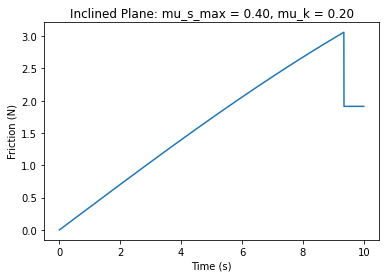

In [5]:
plt.plot(t,f)
plt.xlabel('Time (s)')
plt.ylabel('Friction (N)')
plt.title('Inclined Plane: mu_s_max = 0.40, mu_k = 0.20')
plt.show()

In [6]:
print (t[-1])
for i in range(30,60):
    FPS = i
    framesNum = int(FPS*t[-1])
    if ((nsteps-1)%framesNum==0):
        break
        
print ("n, FPS, framesNum = ", nsteps,FPS,framesNum)

10.0
n, FPS, framesNum =  2001 40 400


In [7]:
from matplotlib import animation
from matplotlib.patches import Rectangle, Ellipse
from IPython.display import HTML
from matplotlib import patches
from matplotlib.collections import PatchCollection

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(xlim=(-0.1, 0.8), ylim=(-0.1, 0.8))
ax.axis('on')

#fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
#plt.plot(xpos,ypos)

plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.title('Inclined Plane: mu_s_max = 0.80, mu_k = 0.80')

#plt.show()

line1, = ax.plot([], [], 'b-', lw=2)
line2, = ax.plot([], [], 'b-', lw=2)
line3, = ax.plot([], [], 'b-', lw=2)
line4, = ax.plot([], [], 'b-', lw=2)
line5, = ax.plot([], [], 'r-', lw=2)

#airpods = Rectangle((xpos[0]-xl/2.0, ypos[0]-yl/2.0),xl,yl,facecolor="blue",fill=True)
ball = Ellipse((xpos[0], ypos[0]),0.01,0.01,facecolor = 'red',fill=True)
phi = 180.0/np.pi*np.arctan(yl/(xl+epsilon))
print (phi)

# Define the different elements in the animation
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    line5.set_data([], [])
    #ax.add_patch(airpods)
    ax.add_patch(ball)
    return line1, line2, line3, line4, line5, ball

# Animation function. This is called sequentially.
def animate(j):
    i = (j+1)*int((nsteps-1)/framesNum)-5
    if debug: i,j,print (xpos[i],ypos[i])
    psil = phi - theta_step[i]
    psir = phi + theta_step[i]
    diag = np.sqrt(xl**2+yl**2)/2.0
    
    thisx = [xpos[i]-diag*np.cos(psil*np.pi/180.0), xpos[i]+diag*np.cos(psir*np.pi/180.0)]
    thisy = [ypos[i]+diag*np.sin(psil*np.pi/180.0), ypos[i]+diag*np.sin(psir*np.pi/180.0)]
    line1.set_data(thisx, thisy)
    
    thisx = [xpos[i]-diag*np.cos(psir*np.pi/180.0), xpos[i]+diag*np.cos(psil*np.pi/180.0)]
    thisy = [ypos[i]-diag*np.sin(psir*np.pi/180.0), ypos[i]-diag*np.sin(psil*np.pi/180.0)]
    line2.set_data(thisx, thisy)
    
    thisx = [xpos[i]-diag*np.cos(psil*np.pi/180.0), xpos[i]-diag*np.cos(psir*np.pi/180.0)]
    thisy = [ypos[i]+diag*np.sin(psil*np.pi/180.0), ypos[i]-diag*np.sin(psir*np.pi/180.0)]
    line3.set_data(thisx, thisy)
    
    thisx = [xpos[i]+diag*np.cos(psir*np.pi/180.0), xpos[i]+diag*np.cos(psil*np.pi/180.0)]
    thisy = [ypos[i]+diag*np.sin(psir*np.pi/180.0), ypos[i]-diag*np.sin(psil*np.pi/180.0)]
    line4.set_data(thisx, thisy)
    
    thisx = [0, xs*np.cos(theta_step[i]*np.pi/180.0)]
    thisy = [0, xs*np.sin(theta_step[i]*np.pi/180.0)]
    line5.set_data(thisx, thisy)
    
    #airpods.set_height = yl
    #airpods.set_width = xl
    #airpods.set_xy = (xpos[i]-xl/2.0, ypos[i]-yl/2.0)
    #airpods._angle = theta_step[i]
    ball.center = (xpos[i], ypos[i])
    
    return line1, line2, line3, line4, line5, ball

# Create animation

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=framesNum, interval=1200/FPS, repeat=False)
anim.save("InclinedPlaneFriction.mp4")
plt.close(anim._fig)

# Display the animation
HTML(anim.to_html5_video())

26.565051165618833
